Uploaded file: great-cow4.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


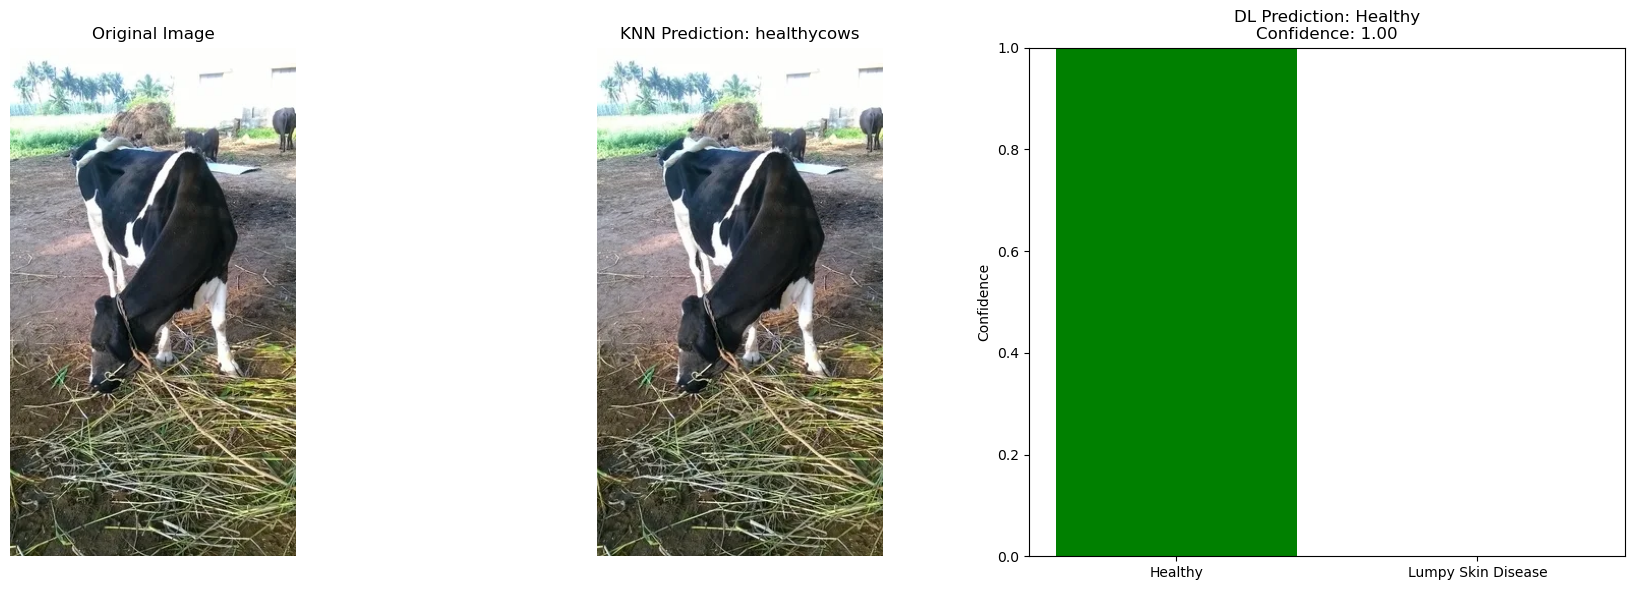

Healthy Healthy
Both models agree on the prediction: healthycows.
Uploaded file: lumpy-cow4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


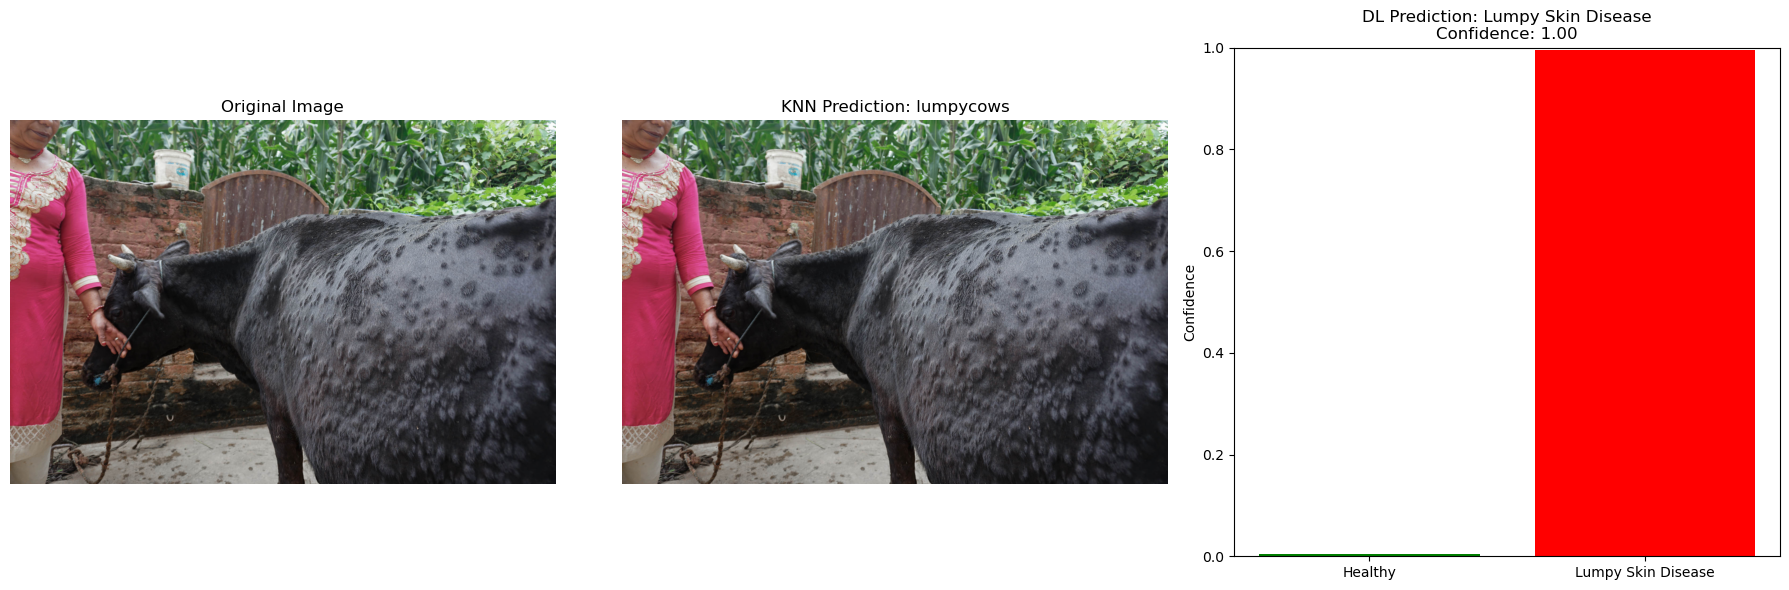

Lumpy Skin Disease Lumpy Skin Disease
Both models agree on the prediction: lumpycows.
Uploaded file: lumpy-cow5.jpg
Error during processing: X has 262144 features, but KNeighborsClassifier is expecting 196608 features as input.
Uploaded file: great-cow.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


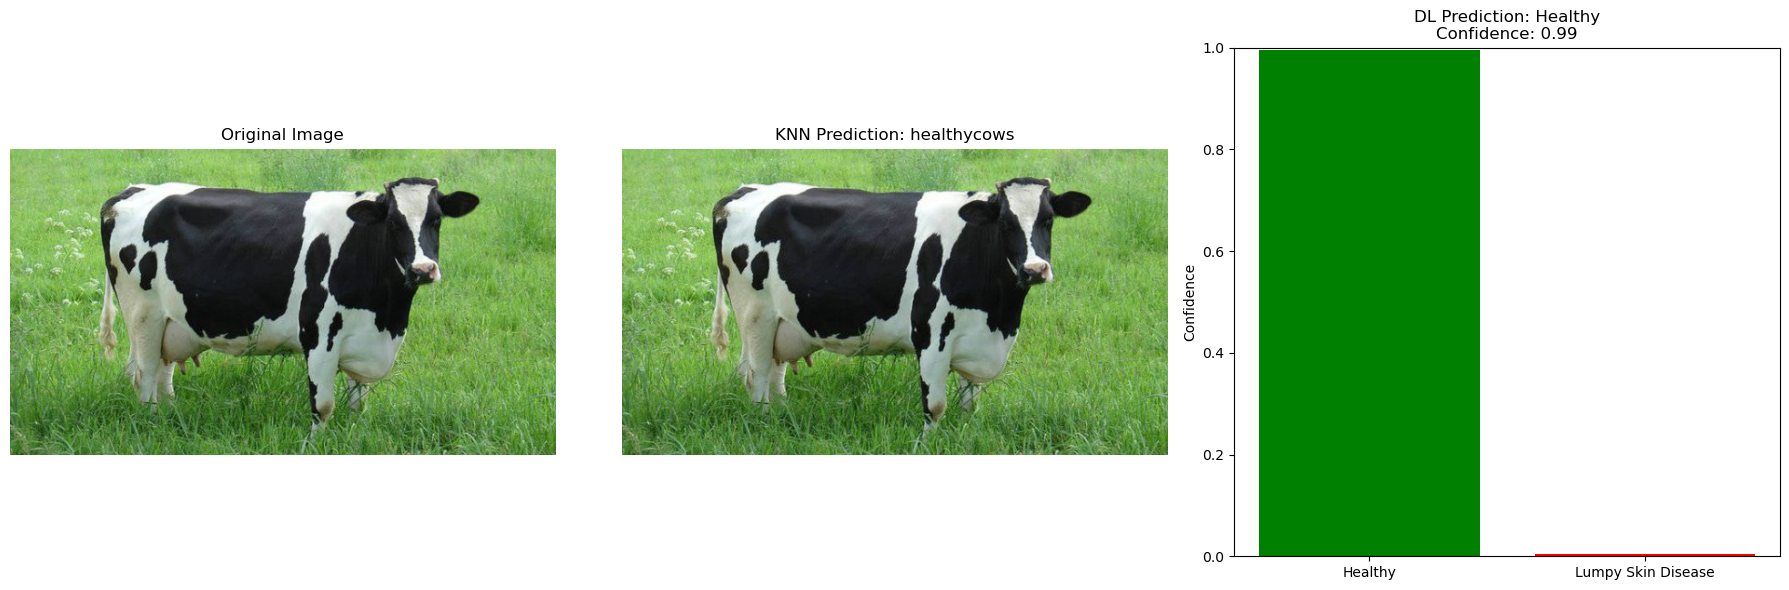

Healthy Healthy
Both models agree on the prediction: healthycows.
Uploaded file: great-cow1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


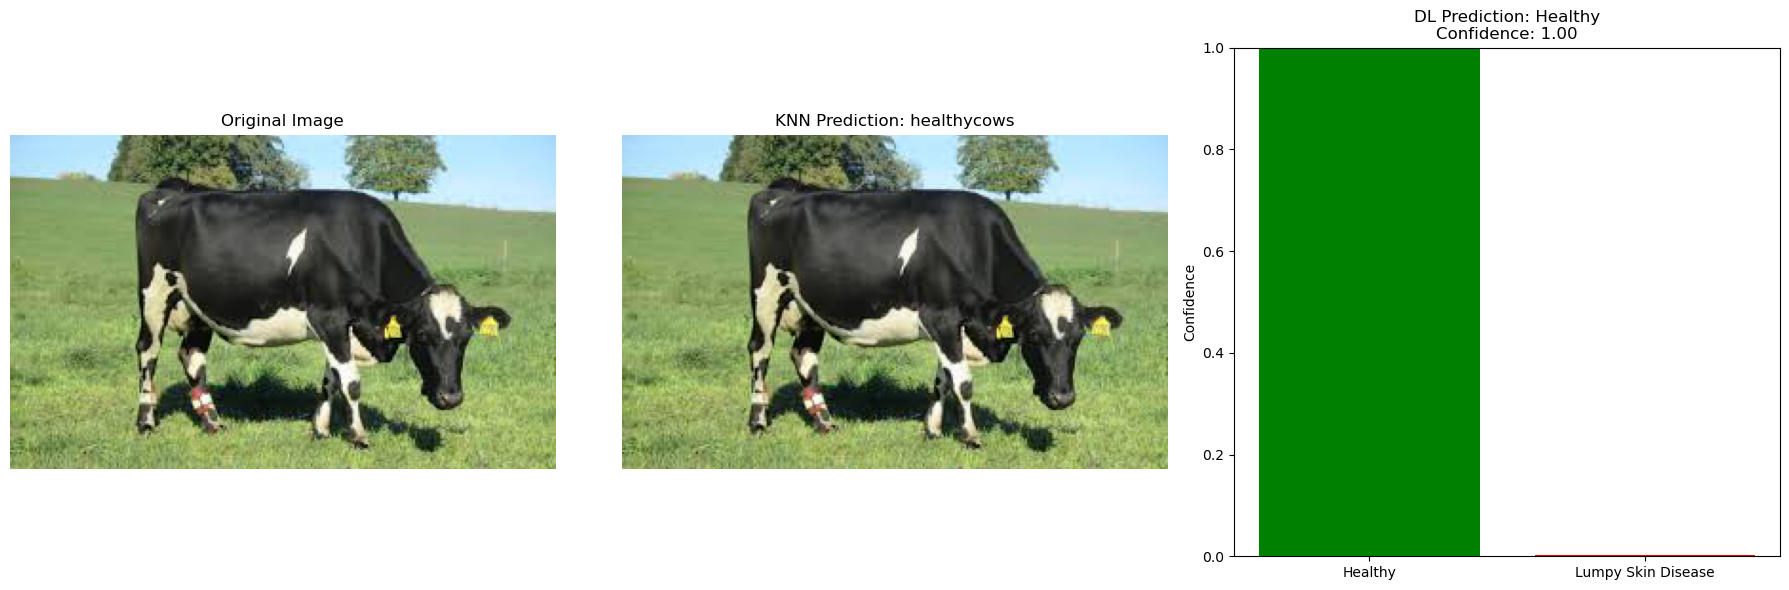

Healthy Healthy
Both models agree on the prediction: healthycows.
Uploaded file: great-cow2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


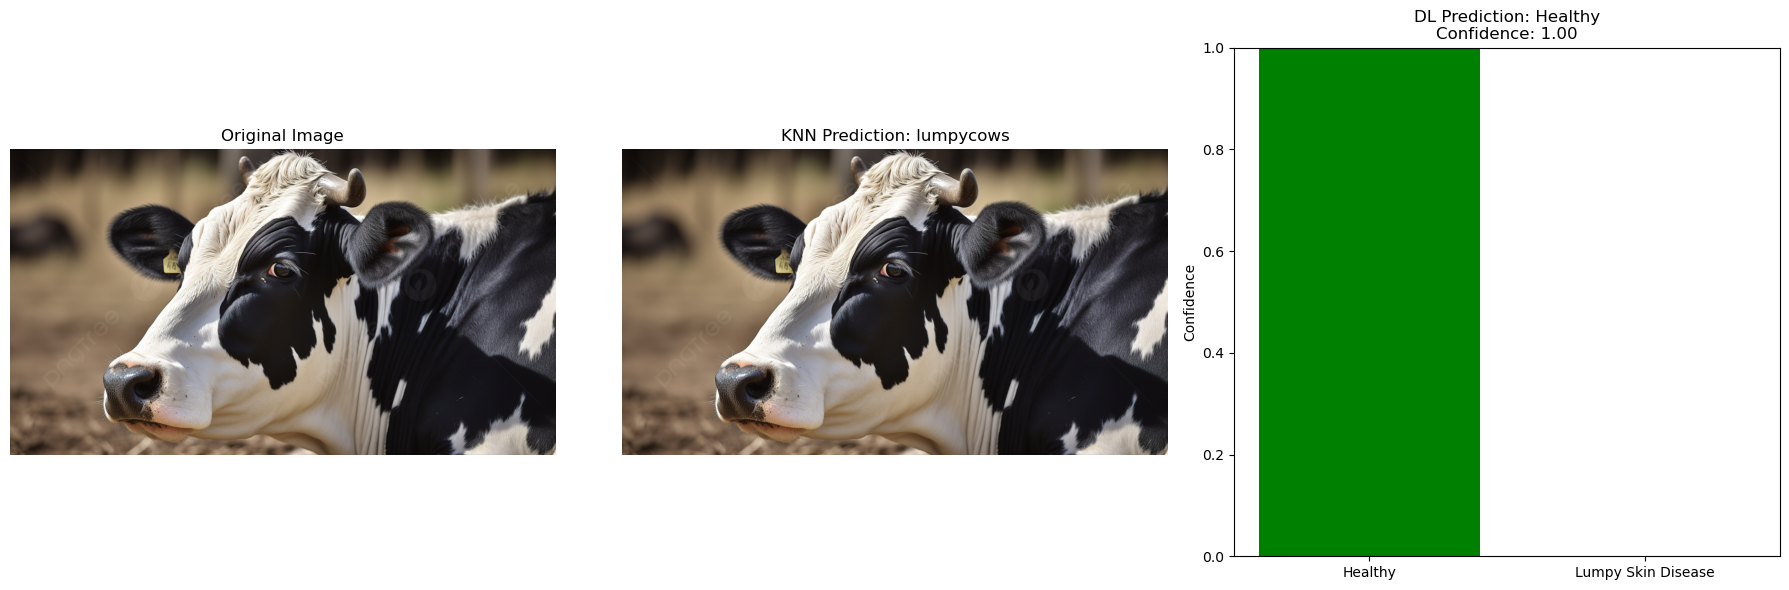

Lumpy Skin Disease Healthy
Models disagree. KNN: lumpycows, DL: Healthy
Uploaded file: great-cow3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


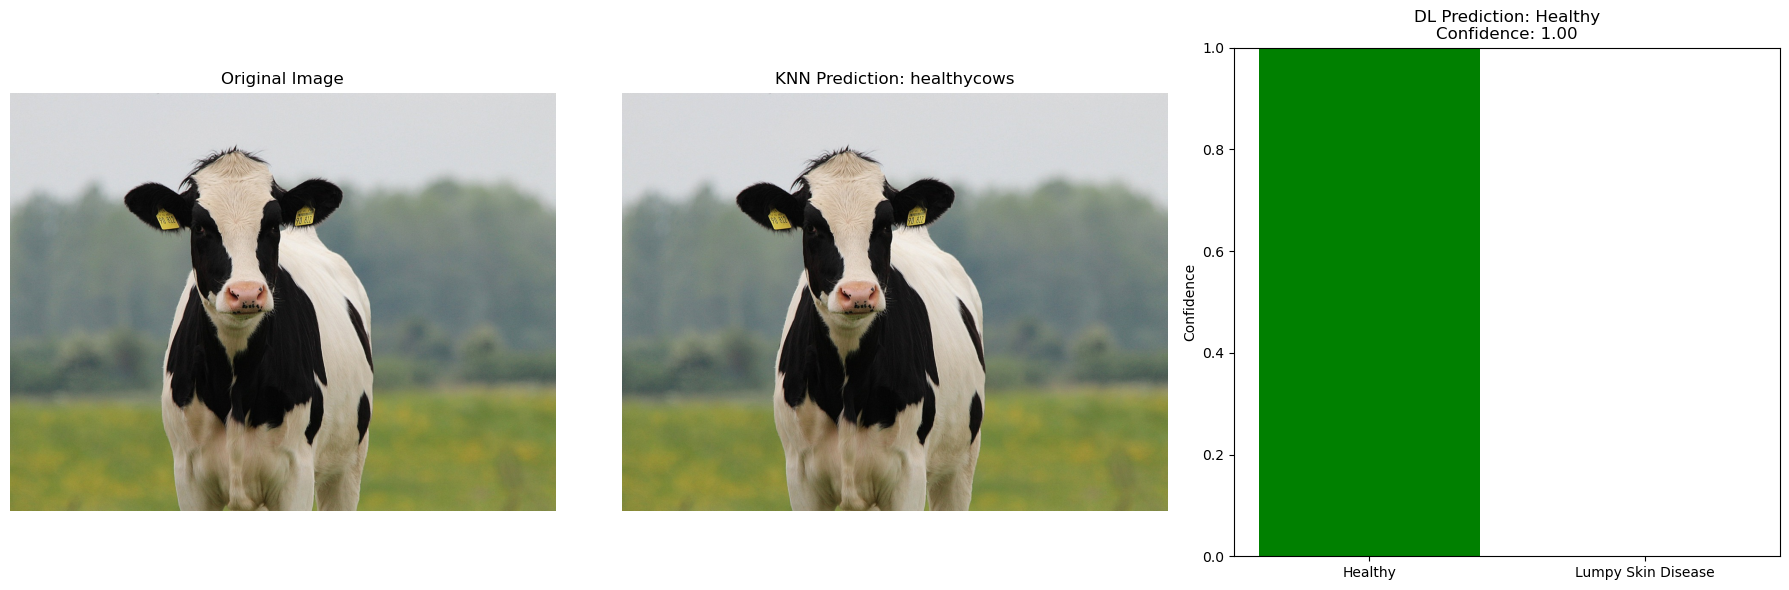

Healthy Healthy
Both models agree on the prediction: healthycows.
Uploaded file: lumpy-cow.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


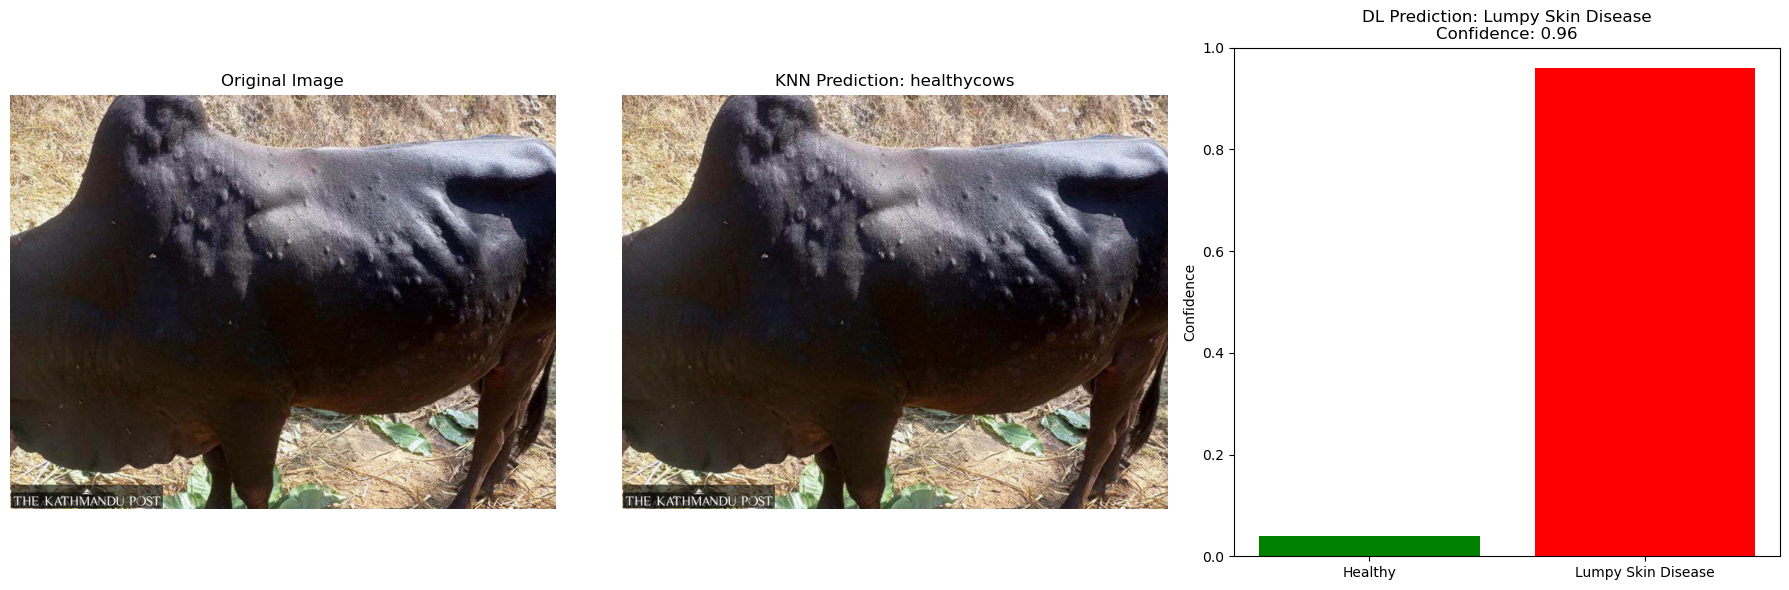

Healthy Lumpy Skin Disease
Models disagree. KNN: healthycows, DL: Lumpy Skin Disease
Uploaded file: lumpy-cow1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


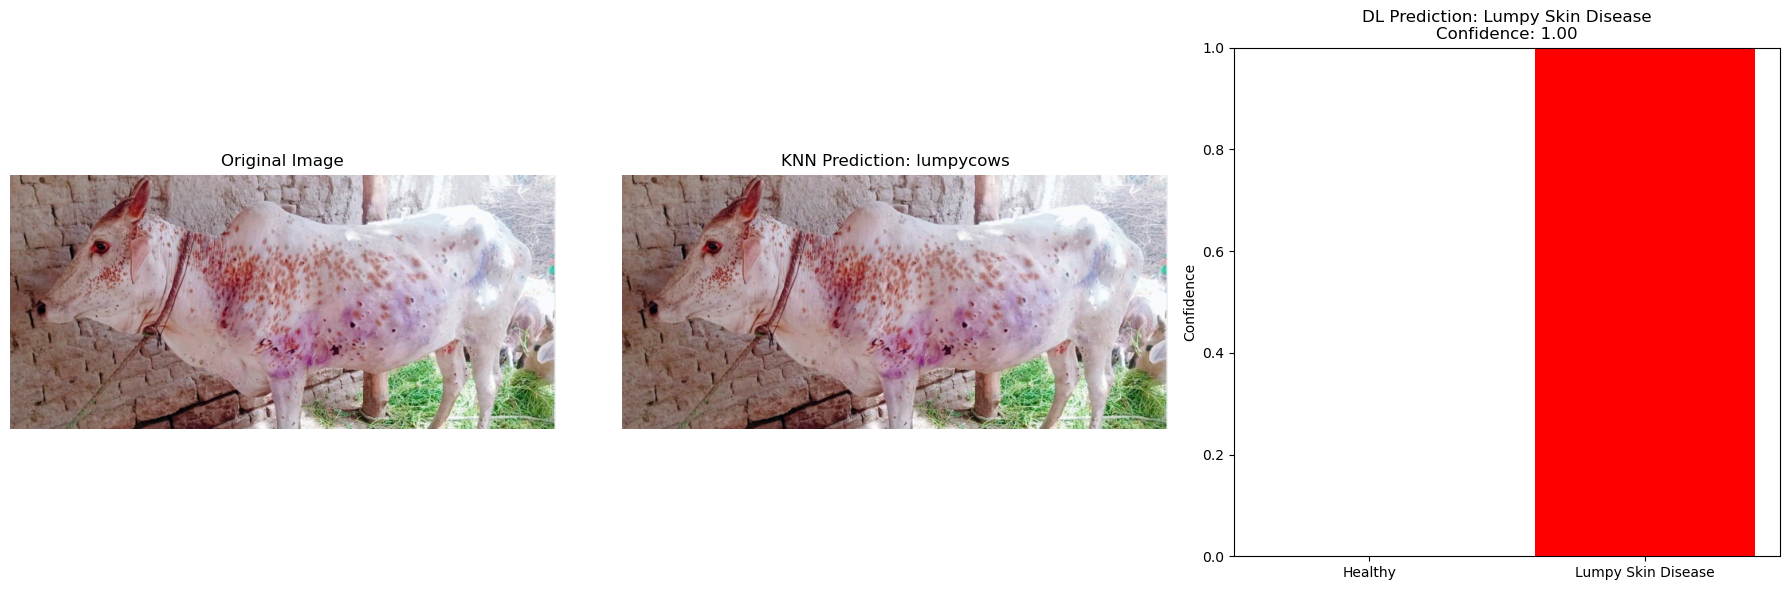

Lumpy Skin Disease Lumpy Skin Disease
Both models agree on the prediction: lumpycows.
Uploaded file: lumpy-cow3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


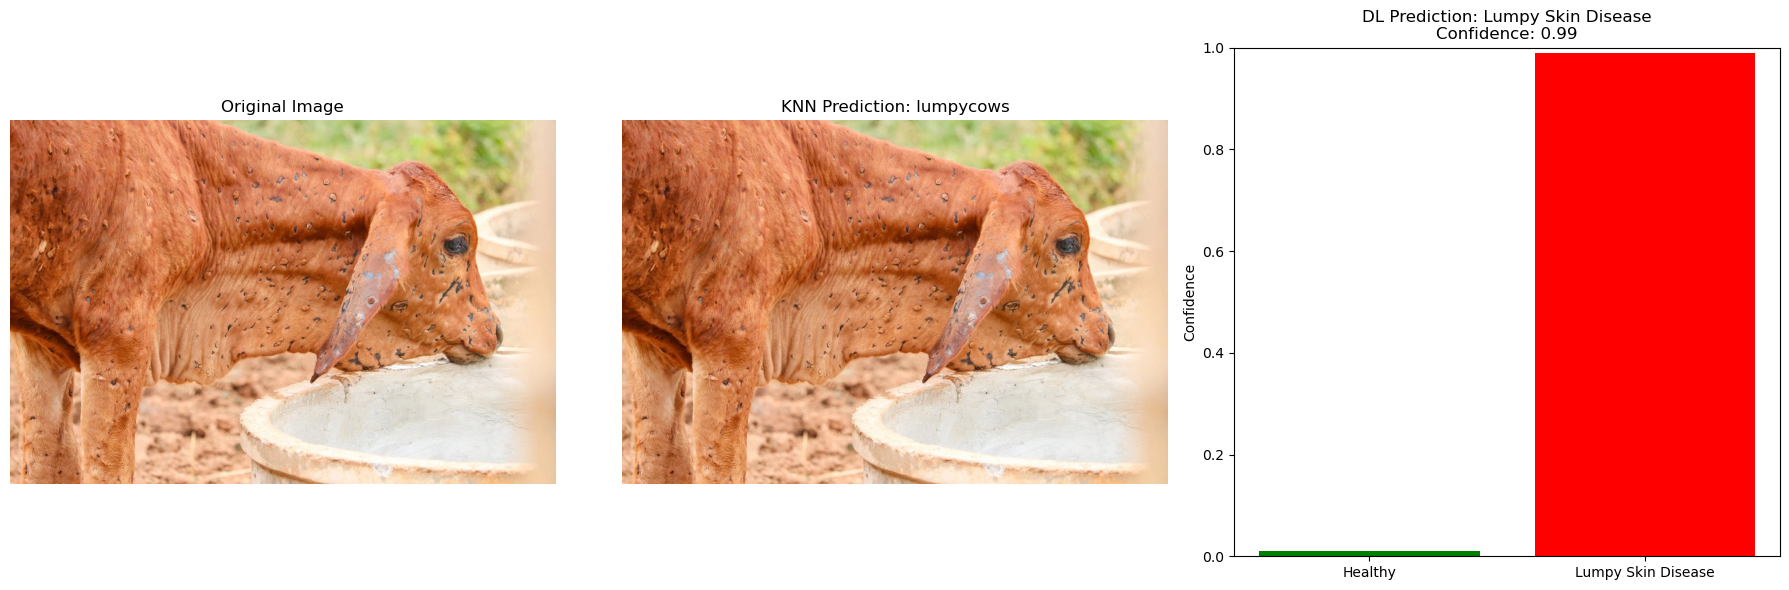

Lumpy Skin Disease Lumpy Skin Disease
Both models agree on the prediction: lumpycows.


FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

In [ ]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model
import io
from PIL import Image, ImageDraw, ImageFont
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to preprocess the image for KNN model
def preprocess_image_for_knn(image, img_size=(256, 256)):
    image_resized = cv2.resize(image, img_size)
    return image_resized

# Function to preprocess the image for deep learning model
def preprocess_image_for_deep_learning(image):
    image_normalized = preprocess_input(image)
    return np.expand_dims(image_normalized, axis=0)

# Function to predict using KNN model
def predict_lsd_knn(image, model_path='knn_model.pkl', encoder_path='label_encoder.pkl'):
    """Predict whether a cow has Lumpy Skin Disease from an image using KNN."""
    with open(model_path, 'rb') as model_file, open(encoder_path, 'rb') as encoder_file:
        knn = pickle.load(model_file)
        label_encoder = pickle.load(encoder_file)
    
    image_flattened = image.reshape(1, -1) / 255.0
    label_encoded = knn.predict(image_flattened)
    label = label_encoder.inverse_transform(label_encoded)
    
    return label[0]

# Function to predict using deep learning model
def predict_lsd_deep_learning(image, model):
    image_preprocessed = preprocess_image_for_deep_learning(image)
    prediction = model.predict(image_preprocessed)[0][0]
    predicted_label = 'Healthy' if prediction < 0.5 else 'Lumpy Skin Disease'
    confidence = max(prediction, 1 - prediction)
    return predicted_label, confidence

# Function to display the predictions side by side
def display_predictions(image, knn_prediction, dl_prediction, dl_confidence):
    """Display the predictions of both KNN and Deep Learning models with confidence."""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Display original image
    axes[0].imshow(image)
    axes[0].axis('off')
    axes[0].set_title("Original Image")
    
    # Display KNN prediction
    axes[1].imshow(image)
    axes[1].axis('off')
    axes[1].set_title(f"KNN Prediction: {knn_prediction}")
    
    # Display Deep Learning prediction with confidence bar
    labels = ['Healthy', 'Lumpy Skin Disease']
    confidence_values = [1 - dl_confidence, dl_confidence] if dl_prediction == 'Lumpy Skin Disease' else [dl_confidence, 1 - dl_confidence]
    axes[2].bar(labels, confidence_values, color=['green', 'red'])
    axes[2].set_title(f"DL Prediction: {dl_prediction}\nConfidence: {dl_confidence:.2f}")
    axes[2].set_ylabel("Confidence")
    axes[2].set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Function to handle image upload and prediction
def on_file_upload(change):
    clear_output(wait=True)
    
    for filename, file_info in change['new'].items():
        print(f"Uploaded file: {filename}")
        
        try:
            image = Image.open(io.BytesIO(file_info['content']))
            image_np = np.array(image)
            
            # Preprocess the image
            image_knn = preprocess_image_for_knn(image_np, img_size=(256, 256))
            image_dl = preprocess_image_for_knn(image_np, img_size=(224, 224))
            
            # Predict using both models
            knn_prediction = predict_lsd_knn(image_knn)
            dl_prediction, dl_confidence = predict_lsd_deep_learning(image_dl, deep_learning_model)
            
            # Display predictions side by side
            display_predictions(image, knn_prediction, dl_prediction, dl_confidence)
            
            predictKnnResult = rearrange_the_knn_prediction(knn_prediction)
            print(predictKnnResult, dl_prediction)
            # Highlight which model outperforms
            if predictKnnResult == dl_prediction:
                print(f"Both models agree on the prediction: {knn_prediction}.")
            else:
                print(f"Models disagree. KNN: {knn_prediction}, DL: {dl_prediction}")
        except Exception as e:
            print(f"Error during processing: {e}")
    
    reset_file_upload_widget()

def rearrange_the_knn_prediction(knnPrediction):
    predicted_output = ""
    if knnPrediction == "healthycows":
        predicted_output = "Healthy"
    elif knnPrediction == "lumpycows":
        predicted_output = "Lumpy Skin Disease"
    return predicted_output

# Function to create and display the file upload widget
def reset_file_upload_widget():
    """Reset and display the file upload widget."""
    file_upload = widgets.FileUpload(
        accept='image/*',  # Accepts image files only
        multiple=True     # Allows single file upload
    )
    file_upload.observe(on_file_upload, names='value')
    display(file_upload)

# Load the deep learning model
deep_learning_model = load_model('lumpy_skin_model.keras')

# Initially display the file upload widget
reset_file_upload_widget()
